Group 1 - Model 1

Chosen dataset: CIFAR-10

**Model by**  Benjamin Hunt, Rodrigo Torralba, Santiago Baron, Bianca


In [2]:
from keras.backend import clear_session  # This is to clear any previous session to prevent reusing old data from  other cells etc.
clear_session()

In [3]:
import numpy as np  # Import libraries like CIFAR-10, Numpys and pandas etc.
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # (Training set: 50,000) - (Test set: 10,000) This will remain untouched until the final evaluation.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Visualize the data : We display a few images per class to understand what the model must learn.  

<Figure size 393.701x393.701 with 0 Axes>

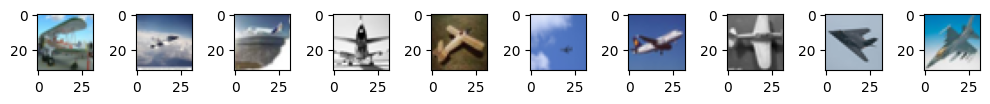

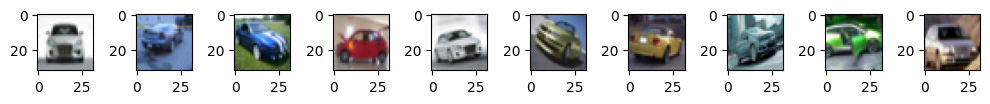

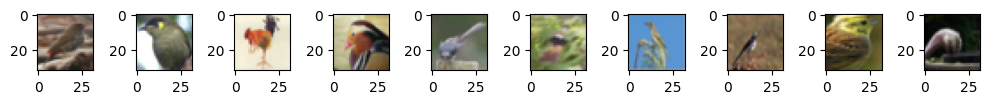

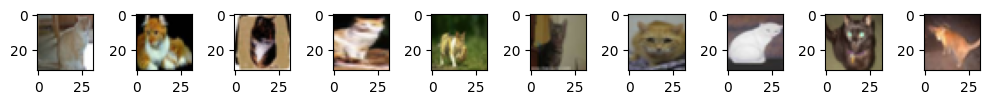

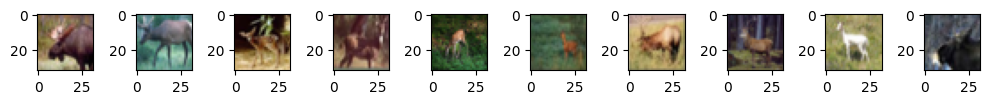

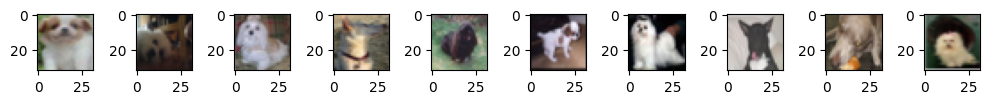

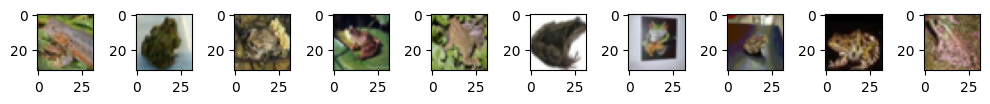

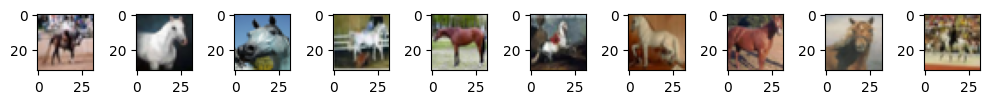

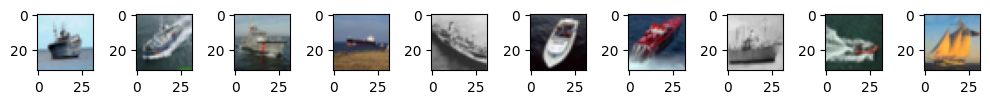

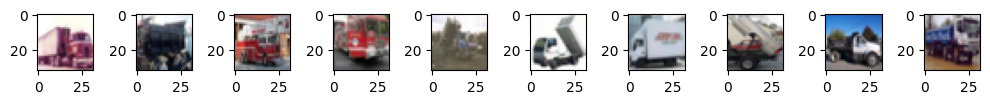

In [5]:

# print(x_train.shape) (check model shape)

num_classes = 10

fig = plt.figure(figsize=(10*1/2.54, 10*1/2.54)) # class to img plot ratio.

for idx_class in range(num_classes): # This section loops through class labels and shows sample images so we can check the dataset format and variety.

  all_idx = np.where(y_train.flatten() == idx_class)[0]

  # random selection of 10 image of each category
  rand_idx = np.random.choice(all_idx, size=10, replace=False)
  selected = x_train[rand_idx]

  plt.figure(figsize=(10, 10))

  for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(selected[i])
    plt.tight_layout()

  plt.show()

Data normalization

In [6]:
x_train = x_train.astype("float32") / 255 # neural networks train more stable when they are converted to [ 0 - 1 ], Here it is done with .astype function to normalize the code from [ 0 - 255 ].
x_test = x_test.astype("float32") / 255

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


Prepare the labels

In [7]:
y_train = to_categorical(y_train, num_classes=10) # Prepare the labels as they class from 0 - 9, this is ideal for catagorical crossentropy.
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape) # Here you casn see our train size and test size.
print(y_test.shape)

(50000, 10)
(10000, 10)


In [8]:
from sklearn.model_selection import train_test_split
import numpy as np

# split out data into train/validation, to make sure each split has the same class balance as the original dataset.
y_train_labels = np.argmax(y_train, axis=1)

x_tr, x_val, y_tr, y_val = train_test_split( # explicitly train the model.
    x_train, y_train,
    test_size=0.1, # explcitly remove 10% for test.
    random_state=42, # random, shuffled state set before running our test.
    stratify=y_train_labels # Here we create our one hot labels.
)

print("x_tr:", x_tr.shape, "x_val:", x_val.shape) # How does our data set structure look like after the split?
print("y_tr:", y_tr.shape, "y_val:", y_val.shape)

x_tr: (45000, 32, 32, 3) x_val: (5000, 32, 32, 3)
y_tr: (45000, 10) y_val: (5000, 10)


In [9]:
import tensorflow as tf
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([ # Not used in final baseline. We use imported callbacks below for overfitting handling.
    layers.RandomFlip("horizontal"),
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomZoom(0.1),
], name="data_augmentation")

Define the first model

In [10]:
input_shape = (32, 32, 3)

model1 = Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3,3), activation='relu'), # Cov2D Learns small visual features (edges/patterns)

        layers.MaxPooling2D(pool_size=(2,2)), # MaxPooling2D reduces spacial size and helps generalize the data.

        layers.Flatten(), # This will convert feature maps into 1 dimension.

        layers.Dense(100, activation='relu'), # 100 Neural nodes in a single layer that are activiated using relu.
        layers.Dense(num_classes, activation="softmax") # Softmax is used to output the probabilties for the 10 classes in this data set.
    ]
)

model1.summary() # preview a nice summery of our model.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7882 - loss: 0.6132 - val_accuracy: 0.6396 - val_loss: 1.1139 - learning_rate: 0.0010
Epoch 2/40
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8020 - loss: 0.5756 - val_accuracy: 0.6452 - val_loss: 1.0972 - learning_rate: 0.0010
Epoch 3/40
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8165 - loss: 0.5367 - val_accuracy: 0.6590 - val_loss: 1.1100 - learning_rate: 0.0010
Epoch 4/40
701/704 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8249 - loss: 0.5136
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8248 - loss: 0.5137 - val_accuracy: 0.6474 - val_loss: 1.1600 - learning_rate: 0.0010
Epoch 5/40
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8624 - loss: 0.4243 - val_accuracy: 0.6584 - val_loss: 1.1240 - learning_rate: 5.0000e-04
Epoch 6/40
691/704 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8731 - loss: 0.3915

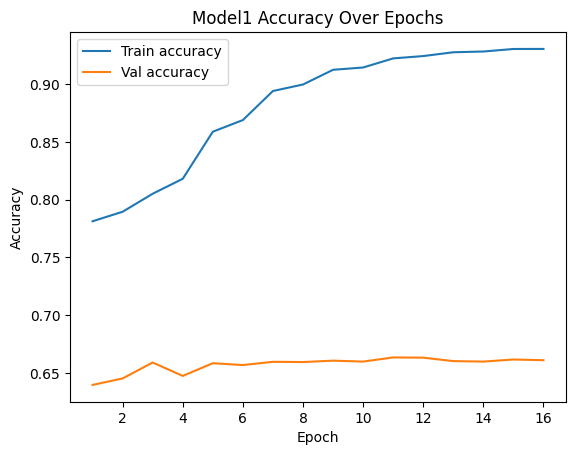

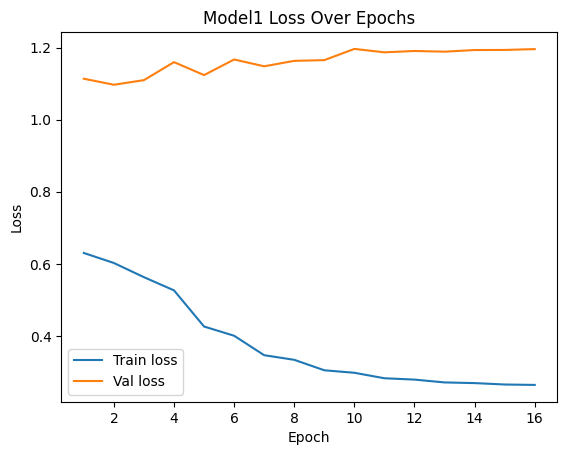

In [12]:
import time # Track time for deeper statistics.
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau # imported to prevent overfitting

# Compile the model before training
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# callbacks to watch the behaviour between val and test to ensure they dont get to far apart, thus prevents over fitting.
early_stop = EarlyStopping(
    monitor="val_accuracy",
    patience=5,                 # stop after 5 epochs with no val_acc improvement
    restore_best_weights=True   # revert weights to best val_acc epoch
)

reduce_lr = ReduceLROnPlateau(  # When the val loss no longer improves. (lower is better), If it detects this, it shrinks the learning rate, letting the model take smaller steps to potentially improve further.
    monitor="val_loss",  # watch validation loss.
    factor=0.5,   # When its triggered multiply learning rate by 0.5
    patience=2,   # if validation loss doesnt improve in 2 epochs in a row, trigger the reduction.
    min_lr=1e-5,   # Dont reduce learning rate below 0.00001
    verbose=1   # print one line at a time per epoch.
)

def format_seconds(s: float) -> str: # a function to improve readabilty of the results in the tests.
    s = max(0.0, float(s))  # safety guard to make sure the value is a float and doesnt go negative.
    m, sec = divmod(s, 60) # m = minutes, sec = seconds. Convertion.
    h, m = divmod(m, 60) # h = hours, m = remaining minutes
    if h >= 1:
        return f"{int(h)}h {int(m)}m {sec:.2f}s"
    if m >= 1:
        return f"{int(m)}m {sec:.2f}s"
    return f"{sec:.2f}s"

t0 = time.perf_counter() # Initialize t0 here

history1 = model1.fit(
    x_tr, y_tr,
    validation_data=(x_val, y_val),  # validation set is taken from training data only
    epochs=40, # High number of Epochs to show our over fitting preventing calls backs work.
    batch_size=64, #
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


t1 = time.perf_counter() # Measure total training time using a monotonic clock

fit_time = t1 - t0

print(f"Fit time (total): {format_seconds(fit_time)}")




epochs_ran = len(history1.history["loss"])
print("Fit time per epoch (avg):", format_seconds(fit_time / epochs_ran)) # We divide total training time by the number of epochs actually completed.
                                                                          # This matters because EarlyStopping might stop before reaching the max epochs.

print("Train accuracy (last):", history1.history["accuracy"][-1]) # history1.history stores a list of values per epoch.
print("Train loss (last):", history1.history["loss"][-1]) # Using [-1] gives the final epoch value (the last item in the list).

print("Val accuracy (last):", history1.history["val_accuracy"][-1])
print("Val loss (last):", history1.history["val_loss"][-1])



val_acc_best = max(history1.history["val_accuracy"]) # We compute the highest validation accuracy achieved across all epochs.
                                                     # This helps us see the best point during training (often earlier than the final epoch).
best_epoch = 1 + history1.history["val_accuracy"].index(val_acc_best)
print("Val accuracy (best):", val_acc_best, "at epoch", best_epoch)

score = model1.evaluate(x_test, y_test, verbose=0) # The test set (x_test/y_test) was never used during training or validation.
                                                   # This is the true generalization score of the model.
                                                  # model.evaluate returns [loss, accuracy] because we compiled with metrics=['accuracy'].

print("TEST loss:", score[0])
print("TEST accuracy:", score[1])


# Epoch index for plotting (1..N)
epochs = range(1, len(history1.history["loss"]) + 1)

# --- Accuracy plot (Train vs Val) ---
plt.figure()
plt.plot(epochs, history1.history["accuracy"], label="Train accuracy")
plt.plot(epochs, history1.history["val_accuracy"], label="Val accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model1 Accuracy Over Epochs")
plt.legend()
plt.show()

# --- Loss plot (Train vs Val) ---
plt.figure()
plt.plot(epochs, history1.history["loss"], label="Train loss")
plt.plot(epochs, history1.history["val_loss"], label="Val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model1 Loss Over Epochs")
plt.legend()
plt.show()

Test loss: 1.106033444404602
Test accuracy: 0.6504999995231628
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


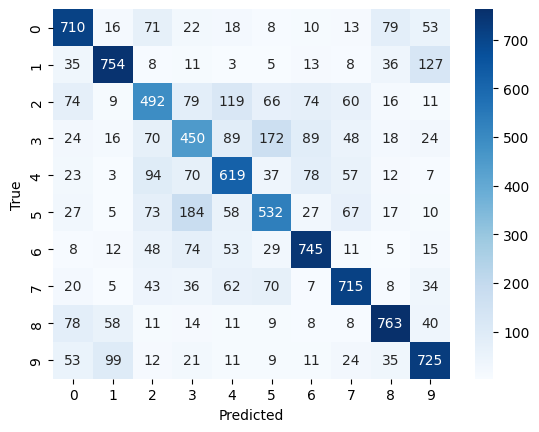

In [ ]:
# FINAL TEST EVALUATION
# The test set (x_test/y_test) was never used during training or validation.
# This is the true generalization score of the model.

score = model1.evaluate(x_test, y_test, verbose=0)

print("Test loss:", score[0])     # score[0] = test loss
print("Test accuracy:", score[1]) # score[1] = test accuracy


# prediction for test.

y_test_pred_prob = model1.predict(x_test) # shape: (10000, 10) probabilities for each test image
y_test_pred = y_test_pred_prob.argmax(axis=1) # convert probabilities → predicted class index (0–9)


# Plotting results into confusion matrix

conf_matr = confusion_matrix(np.argmax(y_test, axis=1), y_test_pred)



sns.heatmap(conf_matr, annot=True, fmt='d', cmap='Blues') # Heatmap makes it easier to see where the model performs well (high diagonal)
                                                          # and where it makes systematic mistakes (clusters off-diagonal).

plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
print(history1.history.keys())
print("Train accuracy:", history1.history["accuracy"][-1])
print("Train loss:", history1.history["loss"][-1])
print("Validation accuracy:", history1.history["val_accuracy"][-1])
print("Validation loss:", history1.history["val_loss"][-1])

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])
Train accuracy: 0.8926222324371338
Train loss: 0.3563234210014343
Validation accuracy: 0.6579999923706055
Validation loss: 1.1661279201507568


In [13]:
import numpy as np
import pandas as pd

# CIFAR-10 label names (adjust if your dataset is different)
class_names = [
    "airplane","automobile","bird","cat","deer",
    "dog","frog","horse","ship","truck"
]

# Predict probabilities on test set
y_prob1 = model1.predict(x_test, verbose=0)

# Predicted class + confidence
y_pred1 = np.argmax(y_prob1, axis=1)
conf1 = np.max(y_prob1, axis=1)

# True class (works if y_test is one-hot)
y_true1 = np.argmax(y_test, axis=1)

# Build results table like Model 4
results1 = pd.DataFrame({
    "image_id": np.arange(len(x_test)),
    "true": y_true1,
    "pred": y_pred1,
    "confidence": conf1
})

results1["true_name"] = results1["true"].map(lambda i: class_names[i])
results1["pred_name"] = results1["pred"].map(lambda i: class_names[i])
results1["correct"] = results1["true"] == results1["pred"]

# Quick check like you did in Model 4
results1["correct"].value_counts()


,count
correct,
True,6492
False,3508


In [21]:
import matplotlib.pyplot as plt
import math

def show_images_by_ids(ids, x_data, results_df, n=8):
    ids = list(ids)[:n]
    cols = 4
    rows = math.ceil(n / cols)

    plt.figure(figsize=(cols * 3.2, rows * 3.2))

    for i, img_id in enumerate(ids):
        row = results_df.loc[results_df["image_id"] == img_id].iloc[0]

        ax = plt.subplot(rows, cols, i + 1)
        plt.imshow(x_data[img_id])
        plt.axis("off")

        status = "✅" if row["correct"] else "❌"
        ax.set_title(
            f"{status} id={img_id}\n"
            f"T: {row['true_name']}\n"
            f"P: {row['pred_name']} ({row['confidence']:.2f})",
            fontsize=9
        )

    plt.tight_layout()
    plt.show()


Model 1 — Confident correct sample:
      image_id   true_name   pred_name  confidence
8235      8235       horse       horse         1.0
2445      2445        frog        frog         1.0
1781      1781        frog        frog         1.0
8575      8575       truck       truck         1.0
4843      4843  automobile  automobile         1.0
6956      6956        frog        frog         1.0
3542      3542       truck       truck         1.0
1839      1839       horse       horse         1.0


/tmp/ipython-input-2962327276.py:26: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


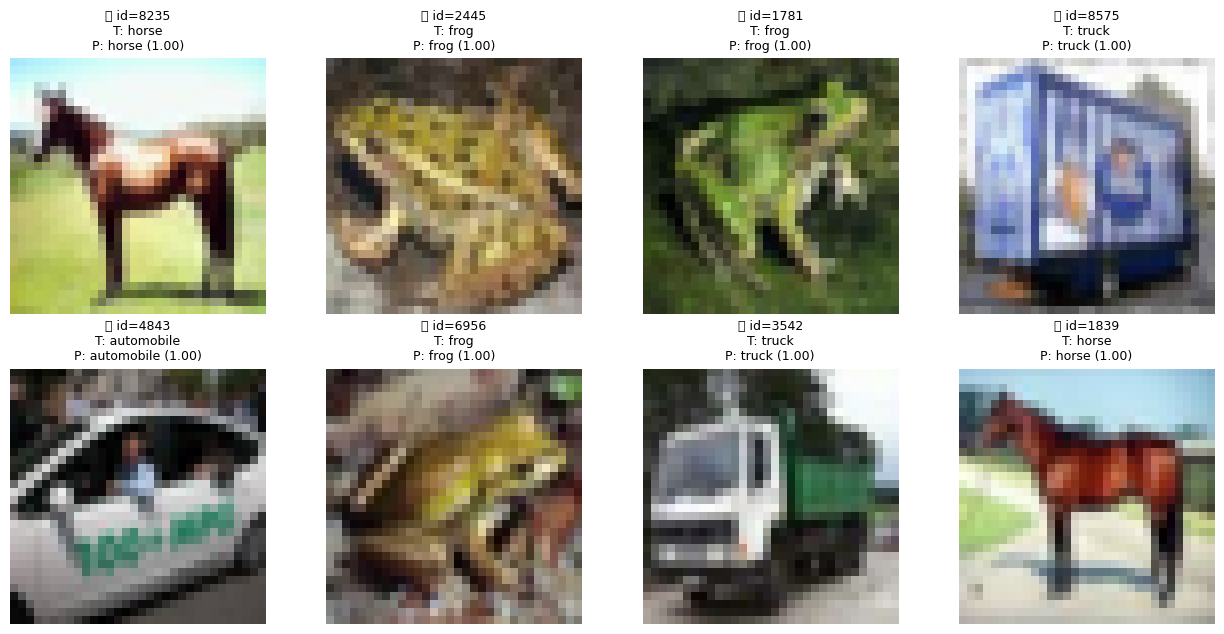

In [22]:
correct1 = results1[results1["correct"] == True].sort_values("confidence", ascending=False)
ids_confident_correct1 = correct1.head(8)["image_id"]

print("Model 1 — Confident correct sample:")
print(correct1.head(8)[["image_id","true_name","pred_name","confidence"]])

show_images_by_ids(ids_confident_correct1, x_test, results1, n=8)


Model 1 — Confident wrong sample:
      image_id   true_name   pred_name  confidence
1382      1382        bird    airplane    0.999995
6030      6030        ship  automobile    0.999974
6832      6832  automobile       truck    0.999949
3721      3721        bird    airplane    0.999946
5416      5416       truck  automobile    0.999831
5972      5972        ship    airplane    0.999808
9559      9559  automobile       truck    0.999804
1969      1969  automobile       truck    0.999799


/tmp/ipython-input-2962327276.py:26: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


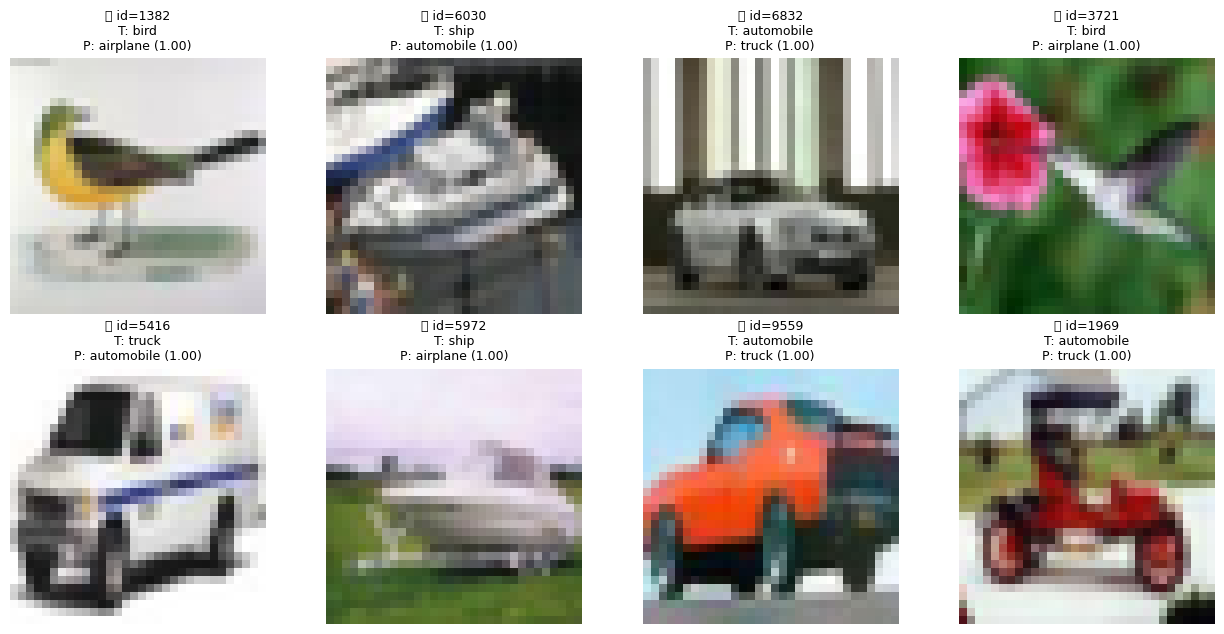

In [23]:
wrong1 = results1[results1["correct"] == False].sort_values("confidence", ascending=False)
ids_confident_wrong1 = wrong1.head(8)["image_id"]

print("Model 1 — Confident wrong sample:")
print(wrong1.head(8)[["image_id","true_name","pred_name","confidence"]])

show_images_by_ids(ids_confident_wrong1, x_test, results1, n=8)

# T = Test says (true label)
# P = Predicted by the model


/tmp/ipython-input-2962327276.py:26: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


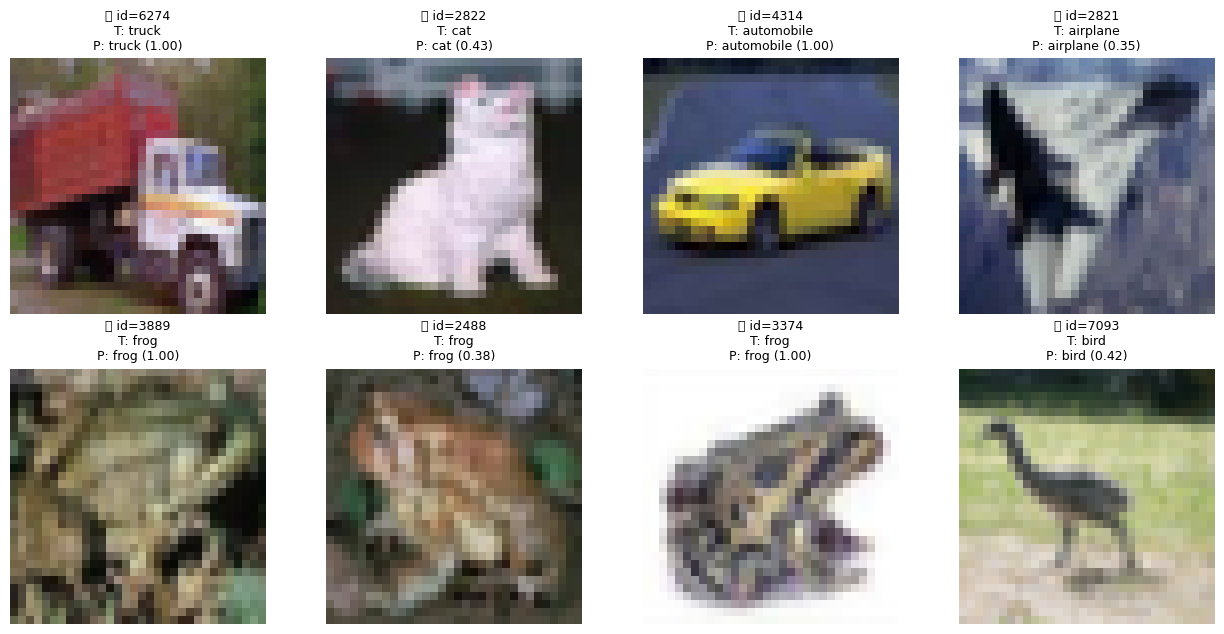

In [19]:
correct_sorted1 = results1[results1["correct"] == True].sort_values("confidence", ascending=False)

top_pool1 = correct_sorted1.head(150)
low_pool1 = correct_sorted1.tail(150)

ids_mix1 = pd.concat([
    top_pool1["image_id"].sample(4, random_state=None),
    low_pool1["image_id"].sample(4, random_state=None)
]).sample(8, random_state=None)

show_images_by_ids(ids_mix1.tolist(), x_test, results1, n=8)


In [25]:
def print_false_prediction_stats(results_df, name="Model"):
    total = len(results_df)
    false_n = (results_df["correct"] == False).sum()
    true_n  = (results_df["correct"] == True).sum()

    print(f"{name} — Total: {total}")
    print(f"{name} — False predictions (wrong): {false_n}")
    print(f"{name} — Correct predictions: {true_n}")
    print(f"{name} — Error rate: {false_n/total:.4f}  ({false_n/total*100:.2f}%)")
    print(f"{name} — Accuracy:  {true_n/total:.4f}  ({true_n/total*100:.2f}%)")

print_false_prediction_stats(results1, "Model 1")



Model 1 — Total: 10000
Model 1 — False predictions (wrong): 3508
Model 1 — Correct predictions: 6492
Model 1 — Error rate: 0.3508  (35.08%)
Model 1 — Accuracy:  0.6492  (64.92%)


In [ ]:
import os
print("Working directory:", os.getcwd())
print("Files here:", os.listdir())

# Save full model (best default)
model1.save("cifar10.v1_G1_cnn.keras")


Working directory: /content
Files here: ['.config', 'sample_data']


In [ ]:
# Load model syntax

# import tensorflow as tf
# model1 = tf.keras.models.load_model("model1.keras")
# print("Loaded model1.keras")


This concludes Model-1  